In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/databyhuseyn/DeepLearning/refs/heads/main/helper_functions.py

--2025-04-28 07:33:30--  https://raw.githubusercontent.com/databyhuseyn/DeepLearning/refs/heads/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.3’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-04-28 07:33:30 (63.1 MB/s) - ‘helper_functions.py.3’ saved [10246/10246]



In [ ]:
from helper_functions import plot_loss_curves, unzip_data, walk_through_dir, create_tensorboard_callback, compare_historys

In [ ]:
# Download data
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

--2025-04-28 07:33:31--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.181.207, 173.194.193.207, 173.194.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.181.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.2’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.008s  

2025-04-28 07:33:31 (70.3 MB/s) - ‘nlp_getting_started.zip.2’ saved [607343/607343]



In [ ]:
#unzip data
unzip_data("nlp_getting_started.zip")

In [ ]:
#Turn .csv files into pandas DataFrame's

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df_shuffled = train_df.sample(frac=1, random_state=42)   #frac returns percentage #sample shuffle dataset and frac tells how MANY PERCENTAGES
train_df_shuffled

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
#How many examples of each class?
train_df.target.value_counts()

,count
target,
0,4342
1,3271


In [ ]:
print(f'Total training samples: {len(train_df)}')
print(f'Total test samples: {len(test_df)}')
print(f'Total samples: {len(train_df) + len(test_df)}')

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


In [ ]:
import random
random_index = random.randint(0, len(train_df) -5)
for row in train_df_shuffled[['text', 'target']][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f'Target:{target}', '(real disaster)' if target > 0 else '(not real disaster)')
  print(f'Text:\n{text}\n')
  print('---\n')

Target:1 (real disaster)
Text:
shootings explosions hand grenades thrown at cars and houses &amp; vehicles and buildings set on fire. It all just baffles me.Is this Sweden?

---

Target:0 (not real disaster)
Text:
@GloriaVelez GM! I pray any attack of the enemy 2 derail ur destiny is blocked by the Lord &amp; that He floods ur life w/heavenly Blessings

---

Target:0 (not real disaster)
Text:
#LonePine remembered around Australia as 'descendants' grow via @666canberra #Gallipoli #WW1
http://t.co/T4fvVnRPc5 http://t.co/0zZnbVFUVO

---

Target:0 (not real disaster)
Text:
1st Quality Insurance Group is #hiring Licensed Property &amp; Casualty Insurance Agent Produc http://t.co/VMJRtuVmh4 #jobs #Denver

---

Target:0 (not real disaster)
Text:
@tweetingLew @tersestuff 

Notley flattened Harper IN HIS Heartland
Harper Imported tens of thousands of TFW slaves COST ALBERTANS JOBS

---



In [ ]:
from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size = 0.1,
                                                                            random_state = 42)

In [ ]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
#View the first 10 training sentence and their labels
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization


text_vectorizer = TextVectorization(max_tokens=None,    # how many words in the vocabulary (all of the different words in your text)      en chox istifade olunan sozleri basha qoyur ve onlari tokenize edir     necheye beraber olsa o qeder ilk bashdan muxtelif sozleri tokenize edir, none qoymushuq ki butun sozleri chevirsin
                                    standardize='lower_and_strip_punctuation',  # how to process text             # hamisini balaca herflerle yazir meselen (standartlashdirmaq uchun)
                                    split='whitespace',   # how to split tokens                           # her bir sozu whitespace ile bolsun
                                    ngrams=None,          # create groups of n-words?
                                    output_mode='int',    # how to map tokens to numbers              reqem formatinda cixarsin
                                    output_sequence_length=None)    # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True)       # Not valid if using max_tokens=None    # mes cumlede 20 soz olmalidi ve 10 soz varsa onda qalan 10 deneni '0' ile evez edir. output_sequence_length aktiv olanda ishe dushur

In [ ]:
round(sum([len(i.split()) for i in train_sentences]) / len(train_sentences))  # ortalama soz uzunlugu tapirirq cunki cumleler eyni uzunluqda olmalidir

15

In [ ]:
# Setup text vectorization with custom variables
max_vocab_length = 10000  #max number of words to have in  our vocabulary
max_length = 15 #length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens= max_vocab_length,
                                    output_mode = 'int',
                                    output_sequence_length=max_length)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
sample_sentences = 'My crocodile ate my friend'
text_vectorizer([sample_sentences])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  13,    1,    1,   13, 1020,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [ ]:
random_sentence = random.choice(train_sentences)
print(f'Original text:\n{random_sentence}\n\nVectorized version:')
text_vectorizer([random_sentence])

Original text:
Just down drown me k I can't swim https://t.co/sJoEing76t

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  29,  134,  486,   31,    1,    8,   98, 2272,    1,    0,    0,
           0,    0,    0,    0]])>

In [ ]:
#Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()     #hansi sozleri oyrenib baxmaq uchun
top_5_words = words_in_vocab[:5]      #most common (notice the [UNK] token stands for 'unknown' words)
bottom_5_words = words_in_vocab[-5:]      #least common tokens

print(f'Number of words in vocab: {len(words_in_vocab)}')
print(f'Top 5 most common words: {top_5_words}')
print(f'Bottom 5 least common words: {bottom_5_words}')

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', np.str_('the'), np.str_('a'), np.str_('in')]
Bottom 5 least common words: [np.str_('pages'), np.str_('paeds'), np.str_('pads'), np.str_('padres'), np.str_('paddytomlinson1')]


In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer='uniform',
                             input_length=max_length,
                             name = 'embedding_1')
embedding

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


<Embedding name=embedding_1, built=False>

In [ ]:
random_sentence = random.choice(train_sentences)
print(f'Original text:\n{random_sentence}\
      \n\nEmbaded version:')
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
drew storen is probably curing cancer &amp; saving puppies from burning buildings while contemplating what he did 2 deserve this disrespect      

Embaded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.02322746, -0.00979261,  0.04719415, ...,  0.02096139,
          0.04343028,  0.00208483],
        [-0.04482871,  0.03901967, -0.02789151, ..., -0.00765133,
          0.0291945 , -0.04413433],
        [ 0.04298213,  0.00918938,  0.04630515, ..., -0.04791067,
         -0.03811771,  0.04016534],
        ...,
        [ 0.02846869,  0.02037684,  0.00451083, ...,  0.02442712,
          0.0163824 ,  0.02275969],
        [ 0.0270534 , -0.03790798,  0.00381802, ..., -0.01149201,
          0.03553661, -0.04248012],
        [ 0.03647751,  0.03593662,  0.04935348, ..., -0.01194952,
          0.04234967, -0.01925374]]], dtype=float32)>

In [ ]:
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.02322746, -0.00979261,  0.04719415, -0.01880223,  0.01130966,
       -0.02236161, -0.0361454 , -0.02220081,  0.02036879,  0.04837294,
        0.02414619, -0.01742648,  0.0416483 ,  0.03980329,  0.01376333,
       -0.02229567, -0.0012881 , -0.04036648,  0.01095718, -0.02457918,
       -0.0388821 ,  0.00829663, -0.01850308,  0.02464619,  0.00732751,
       -0.00407921, -0.01256095,  0.03481596,  0.02618041,  0.00730949,
        0.02425741,  0.02232433, -0.012578  , -0.0275792 ,  0.02255445,
       -0.04775978,  0.02916523, -0.04860174,  0.02687385, -0.02001841,
       -0.00423843, -0.01418835, -0.01174822,  0.01849625,  0.00108347,
        0.02497996,  0.00124644,  0.0248111 ,  0.02301296,  0.03673897,
       -0.00598425,  0.03629932, -0.04230738, -0.03158736, -0.03172664,
        0.04841149,  0.01988358, -0.03869348, -0.00388616, -0.03968944,
       -0.04763103,  0.04813427, -0.04122007, -0.04339349,  0.00480254,
       -0.005859

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

model_0_history = model_0.fit(train_sentences, train_labels)

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f'Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%')

Our baseline model achieves an accuracy of: 79.27%


In [ ]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
model_0.predict(["earthquake didn't happen"])

array([1])

#Creating an evaluation function for our model experiments


we could evaluate these as they are but since we're going to be evaluating several models in the same way going forward, let's create a helper function wihich takes an array of predictions and ground truth labels and computes the following

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
  model_results = {'accuracy': model_accuracy,
                   'precision': model_precision,
                   'recall': model_recall,
                   'f1': model_f1}
  return model_results

In [ ]:
baseline_results = calculate_results(y_true = val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

#Model1:A simple dense model

In [ ]:
from helper_functions import create_tensorboard_callback

SAVE_DIR = 'model_logs'

In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs, name = 'model_1_dense')

In [ ]:
model_1.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_5            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,129 (4.88 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                       experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20250428-073333
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.6427 - loss: 0.6479 - val_accuracy: 0.7651 - val_loss: 0.5323
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8103 - loss: 0.4646 - val_accuracy: 0.7887 - val_loss: 0.4733
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.8528 - loss: 0.3612 - val_accuracy: 0.7940 - val_loss: 0.4616
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8871 - loss: 0.2950 - val_accuracy: 0.7874 - val_loss: 0.4680
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9077 - loss: 0.2463 - val_accuracy: 0.7782 - val_loss: 0.4839


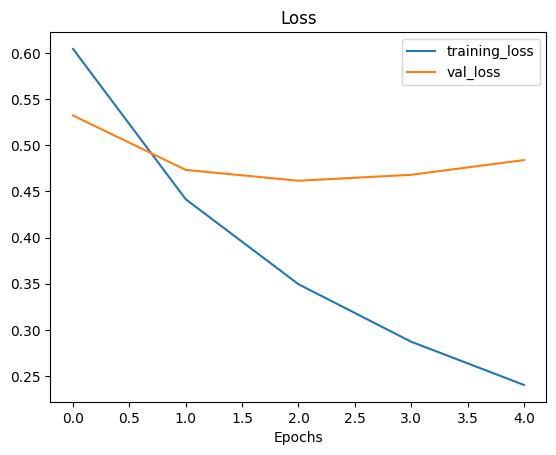

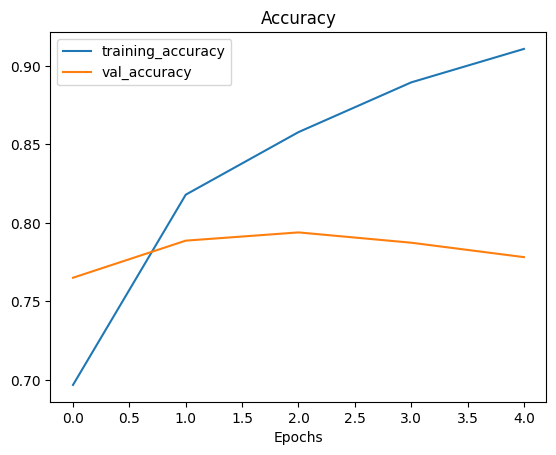

In [ ]:
plot_loss_curves(model_1_history)

In [ ]:
model_1.evaluate(val_sentences, val_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7679 - loss: 0.5162


[0.4839457869529724, 0.778215229511261]

In [ ]:
embedding.weights

[<Variable path=embedding_1/embeddings, shape=(10000, 128), dtype=float32, value=[[ 0.03892157  0.03447224  0.05022293 ... -0.04827416  0.05245722
   -0.03672223]
  [ 0.05528559 -0.02698195  0.042399   ...  0.00240183  0.02846651
    0.0561429 ]
  [-0.02429631 -0.00801254  0.04541418 ... -0.01424552  0.00613989
   -0.00384214]
  ...
  [-0.01701934  0.02184114  0.00779424 ...  0.03556908  0.01218939
   -0.02567813]
  [ 0.00794094  0.04886377 -0.0055487  ... -0.01937747  0.06844512
    0.01356481]
  [ 0.03885207  0.03161397  0.04736452 ... -0.03058487  0.01572824
    0.08799896]]>]

In [ ]:
embed_weights = model_1.get_layer('embedding_1').get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [ ]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


array([[0.3363427 ],
       [0.73691344],
       [0.9977571 ],
       [0.18675776],
       [0.09801266],
       [0.9440324 ],
       [0.88635755],
       [0.99440604],
       [0.96163   ],
       [0.39775184]], dtype=float32)

In [ ]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [ ]:
tf.squeeze(model_1_pred_probs).shape

TensorShape([762])

In [ ]:
model_1_results = calculate_results(y_true = val_labels,
                                    y_pred = model_1_preds)

How many we compare first deep model to our baseline model?

In [ ]:
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [ ]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f'Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key] - value:.2f}')

compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_1_results)

Baseline accuracy: 79.27, New accuracy: 77.82, Difference: -1.44
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.01


Vizualizing learned embeddings

In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000,
 ['',
  '[UNK]',
  np.str_('the'),
  np.str_('a'),
  np.str_('in'),
  np.str_('to'),
  np.str_('of'),
  np.str_('and'),
  np.str_('i'),
  np.str_('is')])

In [ ]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_5            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,840,389 (14.65 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,560,260 (9.77 MB)

In [ ]:
embed_weights = model_1.get_layer('embedding_1').get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [ ]:
# Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
import io

# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0:
     continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

# Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Model 2

In [ ]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(50, input_shape=(1,), activation='relu', kernel_initializer='he_normal')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name='model_2_dense')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_2.summary()

Model: "model_2_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_5            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        35,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,315,851 (5.02 MB)

 Trainable params: 1,315,851 (5.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=['accuracy'])

In [ ]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20250428-073406
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.8675 - loss: 0.3673 - val_accuracy: 0.7795 - val_loss: 0.5884
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9307 - loss: 0.1791 - val_accuracy: 0.7795 - val_loss: 0.7067
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9452 - loss: 0.1430 - val_accuracy: 0.7730 - val_loss: 0.9127
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9543 - loss: 0.1140 - val_accuracy: 0.7664 - val_loss: 1.2536
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9651 - loss: 0.0946 - val_accuracy: 0.7756 - val_loss: 1.0656


In [ ]:
model_2_pred_props = model_2.predict(val_sentences)
model_2_pred_props[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


array([[9.6422747e-02],
       [7.6178950e-01],
       [9.9999958e-01],
       [7.3214814e-02],
       [6.3756386e-05],
       [1.0000000e+00],
       [8.6290473e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [7.9597640e-01]], dtype=float32)

In [ ]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_props))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_2_results = calculate_results(val_labels, model_2_preds)
model_2_results

{'accuracy': 77.55905511811024,
 'precision': 0.7754996204788492,
 'recall': 0.7755905511811023,
 'f1': 0.7746985796594229}

#Model 3

In [ ]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(50, input_shape=(1,), activation='relu', kernel_initializer='he_normal')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs, name='model_3_dense')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_3.summary()

Model: "model_3_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_5            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 50)             │        27,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,307,051 (4.99 MB)

 Trainable params: 1,307,051 (4.99 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=['accuracy'])

In [ ]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20250428-073456
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8362 - loss: 0.3600 - val_accuracy: 0.7743 - val_loss: 0.7787
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.9640 - loss: 0.1002 - val_accuracy: 0.7664 - val_loss: 0.9676
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9737 - loss: 0.0761 - val_accuracy: 0.7612 - val_loss: 1.1883
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9752 - loss: 0.0725 - val_accuracy: 0.7598 - val_loss: 1.1960
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.9734 - loss: 0.0701 - val_accuracy: 0.7546 - val_loss: 1.1677


In [ ]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


((762, 1),
 array([[5.72294295e-02],
        [8.32766175e-01],
        [9.99973238e-01],
        [1.06352314e-01],
        [8.90579031e-05],
        [9.99986649e-01],
        [2.80905992e-01],
        [9.99999940e-01],
        [9.99998391e-01],
        [8.81105423e-01]], dtype=float32))

In [ ]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1.], dtype=float32)>

In [ ]:
model_3_results = calculate_results(y_true = val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 75.45931758530183,
 'precision': 0.7543596436293261,
 'recall': 0.7545931758530183,
 'f1': 0.7535158648005912}

In [ ]:
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 79.27, New accuracy: 75.46, Difference: -3.81
Baseline precision: 0.81, New precision: 0.75, Difference: -0.06
Baseline recall: 0.79, New recall: 0.75, Difference: -0.04
Baseline f1: 0.79, New f1: 0.75, Difference: -0.03


#Model4: LSTM

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name = 'embedding_2')

inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_4_embedding(x)
print(x.shape)

x = layers.LSTM(64)(x)
print(x.shape)

outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_4 = tf.keras.Model(inputs, outputs, name = 'model_2_LSTM')

(None, 15, 128)
(None, 64)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model_4.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_4.summary()

Model: "model_2_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_5            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,329,473 (5.07 MB)

 Trainable params: 1,329,473 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20250428-073541
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.6710 - loss: 0.5815 - val_accuracy: 0.7756 - val_loss: 0.4603
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.8671 - loss: 0.3292 - val_accuracy: 0.7533 - val_loss: 0.5233
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9158 - loss: 0.2257 - val_accuracy: 0.7493 - val_loss: 0.6781
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9489 - loss: 0.1453 - val_accuracy: 0.7559 - val_loss: 0.6945
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9646 - loss: 0.1097 - val_accuracy: 0.7677 - val_loss: 0.6314


In [ ]:
model_4_pred_props = model_10.predict(val_sentences)
model_4_pred_props[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


array([[0.1771042 ],
       [0.8089347 ],
       [0.9876126 ],
       [0.21941078],
       [0.7601876 ],
       [0.76526886],
       [0.98352754],
       [0.9785261 ],
       [0.95653486],
       [0.10656871]], dtype=float32)

In [ ]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_props))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 81.75853018372703,
 'precision': 0.8177933628741751,
 'recall': 0.8175853018372703,
 'f1': 0.8169333236783015}

#Model_5

In [ ]:
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name = 'embedding_2')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.LSTM(64, return_sequences=True, kernel_regularizer='l2')(x)
x = layers.LSTM(64, return_sequences=True, kernel_regularizer='l2')(x)
x = layers.LSTM(64)(x)
x = layers.Dropout(rate=0.2)(x)
x = layers.Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2')(x)
x = layers.Dropout(rate=0.2)(x)
x = layers.Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2')(x)
x = layers.Dropout(rate=0.2)(x)
x = layers.Dense(8, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2')(x)
outputs = layers.Dense(1, activation='sigmoid', kernel_regularizer='l2')(x)
model_5 = tf.keras.Model(inputs, outputs, name='model_3_LSTM')

In [ ]:
model_5.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_5.summary()

Model: "model_3_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_5            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 15, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 15, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,401,969 (5.35 MB)

 Trainable params: 1,401,969 (5.35 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20250428-073637
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 26s 72ms/step - accuracy: 0.6349 - loss: 3.1761 - val_accuracy: 0.7703 - val_loss: 0.8525
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.8341 - loss: 0.6799 - val_accuracy: 0.7546 - val_loss: 0.6985
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9002 - loss: 0.4058 - val_accuracy: 0.7388 - val_loss: 0.7493
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9280 - loss: 0.3332 - val_accuracy: 0.7349 - val_loss: 0.7901
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - accuracy: 0.9429 - loss: 0.2846 - val_accuracy: 0.7441 - val_loss: 0.8059


In [ ]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

NameError: name 'model_5_pred_probs' is not defined

In [ ]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

In [ ]:
model_5_results = calculate_results(y_true = val_labels,
                                    y_pred=model_5_preds)
model_5_results

#Model_6

In [ ]:
model_6_embedding = layers.Embedding(input_dim = max_vocab_length,
                                     output_dim = 1,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_2')

In [ ]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_6_embedding(x)
x = layers.LSTM(1, kernel_regularizer='l2')(x)
outputs = layers.Dense(1, activation='sigmoid', kernel_regularizer='l2')(x)
model_6 = tf.keras.Model(inputs, outputs, name='model_6_LSTM')

In [ ]:
model_6.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_6.summary()

In [ ]:
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

In [ ]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

In [ ]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

In [ ]:
model_6_results = calculate_results(y_true = val_labels,
                                    y_pred=model_6_preds)
model_6_results

#GRU - Gated Recurrent Unit

GRU tries to learn contxt of words instead of sequence

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_7_embedding = layers.Embedding(input_dim = max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_7')
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_7_embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_7 = tf.keras.Model(inputs, outputs, name='model_7_GRU')

In [ ]:
model_7.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_7.summary()

In [ ]:
model_7_history = model_7.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

In [ ]:
!wget https://raw.githubusercontent.com/databyhuseyn/DeepLearning/refs/heads/main/helper_functions.py

In [ ]:
from helper_functions import plot_loss_curves, unzip_data, walk_through_dir, create_tensorboard_callback, compare_historys

In [ ]:
plot_loss_curves(model_7_history)

In [ ]:
model_7preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

In [ ]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

In [ ]:
model_7_results = calculate_results(y_true = val_labels,
                                    y_pred=model_7_preds)
model_7_results

#Model 8:Bidirectional LSTM model

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_8_embedding = layers.Embedding(input_dim = max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_8')
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_8_embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_8 = tf.keras.Model(inputs, outputs, name='model_8_Bidirectional')

In [ ]:
model_8.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_8.summary()

In [ ]:
model_8_history = model_8.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

In [ ]:
model_8_preds_props = model_8.predict(val_sentences)
model_8_preds_props[:20]

In [ ]:
model_8_preds = tf.squeeze(tf.round(model_8_preds_props))
model_8_preds[:10]

In [ ]:
model_8_results = calculate_results(y_true = val_labels,
                                    y_pred=model_8_preds)
model_8_results

In [ ]:
compare_baseline_to_new_results(baseline_results, model_8_results)

# Convolutional Neural Networks for Text

Model 9:Conv1D

In [ ]:
embedding_test = embedding(text_vectorizer(['this is a test sentence']))
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation='relu')
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPooling1D()
max_pool_output = max_pool(conv_1d_output)
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

In [ ]:
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_9_embedding = layers.Embedding(input_dim = max_vocab_length,
                                     output_dim = 128,
                                     embeddings_initializer = 'uniform',
                                     input_length=max_length,
                                     name='embeding_9')

from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_9_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation='relu')(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_9 = tf.keras.Model(inputs, outputs, name='model_9')

In [ ]:
model_9.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_9.summary()

In [ ]:
model_9_history = model_9.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

In [ ]:
plot_loss_curves(model_9_history)

In [ ]:
model_9_pred_probs = model_9.predict(val_sentences)
model_9_pred_probs[:10]

In [ ]:
model_9_preds = tf.squeeze(tf.round(model_9_pred_probs))
model_9_preds[:10]

In [ ]:
model_9_preds = tf.squeeze(tf.round(model_9_pred_probs))
model_9_preds[:10]

In [ ]:
model_9_results = calculate_results(y_true = val_labels,
                                    y_pred=model_9_preds)
model_9_results

#Model 10 : Tensorflow Hub Pretrained Sentence Encoder

In [ ]:
import tensorflow_hub as hub
embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')
embed_samples = embed([sample_sentences,
                       'When you call the universal sentence, it turns into numbers.'])
print(embed_samples[0][:50])

In [ ]:
embed_samples[0].shape

In [ ]:
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name = 'USE')

In [ ]:
hub_layer_wrapper = tf.keras.layers.Lambda(lambda x: sentence_encoder_layer(x))

In [ ]:
model_10 = tf.keras.Sequential([
    hub_layer_wrapper,
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name='model_10_USE')

model_10.compile(loss='binary_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

In [ ]:
model_10.summary()

In [ ]:
model_10_history = model_10.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

In [ ]:
plot_loss_curves(model_10_history)

In [ ]:
model_10_pred_props = model_10.predict(val_sentences)
model_10_pred_props[:10]

In [ ]:
model_10_preds = tf.squeeze(tf.round(model_10_pred_props))
model_10_preds[:10]

In [ ]:
model_10_results = calculate_results(val_labels, model_10_preds)
model_10_results

In [ ]:
compare_baseline_to_new_results(baseline_results, model_10_results)

#Model 11: Tensorflow Hub Pretrained Sentence Encoder 10% of the training data

In [ ]:
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                           train_labels,
                                                                                                                           test_size = 0.1,
                                                                                                                           random_state=42)

In [ ]:
print(f'Total training examples: {len(train_sentences)}')
print(f'Length of 10% training examples: {len(train_sentences_10_percent)}')

In [ ]:
pd.Series(train_labels_10_percent).value_counts()

In [ ]:
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name = 'USE')

In [ ]:
model_11 = tf.keras.Sequential([
    hub_layer_wrapper,
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name='model_10_USE')

In [ ]:
#model_11 = tf.keras.models.clone_model(model_10)

model_11.compile(loss = 'binary_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(),
                 jit_compile=False,
                 metrics=['accuracy'])

model_11.summary()

In [ ]:
model_11_history = model_11.fit(train_sentences_10_percent,
                                train_labels_10_percent,
                                epochs=5,
                                validation_data=(val_sentences, val_labels),
                                callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                      experiment_name='simple_dense_model')])

In [ ]:
model_11_pred_props = model_10.predict(val_sentences)
model_11_pred_props[:10]

In [ ]:
model_11_preds = tf.squeeze(tf.round(model_10_pred_props))
model_11_preds[:10]

In [ ]:
model_11_results = calculate_results(val_labels, model_10_preds)
model_11_results

In [ ]:
compare_baseline_to_new_results(baseline_results(val_labels, model_11_results))

#Comparins the performance of each of our models

In [ ]:
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_embeddin,
                                  "conv1d": model_5_embedding
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model__7_results
                                  })
all_model_results = all_model_results.transpose()
all_model_results

In [ ]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100

TypeError: unsupported operand type(s) for /: 'Embedding' and 'int'

In [ ]:
all_model_results.plot(kind)

In [ ]:
all_model_results.sort_values('f1', ascending=False)['f1'].baselinee_pred_probs = np.max(model_0.predict_proba(calculate_results axis=1))
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_8_pred_props, axis=1) + tf.squeeze(model_10_pred_props, axis = 1)
combined_preds

In [ ]:
model_10.save('model_10.keras')

#Finding the most wrong examples

In [ ]:
val_df = pd.DataFrame({'text' : va_sentences,
                       'target': val_labels,
                       'pred': model_10_preds,
                       'pred_prob': tf.squeeze(model_10_pred_props)})
val_df.head()

In [ ]:
most_wrong = val_df[val_df['target'] !=val_df['pred']].sort_values('pred_prob', ascending=False)
ost_wrong[:10]

In [ ]:
for row in most_wrong[:10].itertuples():
  _, text, target, pred, prob = row
  print(f'Target: {target}, Pred:{int(pred)}, Prob: {prob}')
  print(f'Text: \n{text}\n')
  print('----\n')

NameError: name 'most' is not defined

In [ ]:
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f'Target: {target}, Pred:{int(pred)}, Prob: {prob}')
  print(f'Text: \n{text}\n')
  print('----\n')